# MUSHROOM CLASSIFCATION


## ABOUT DATASET
    This dataset contains data which shows whether a mushroom is poisonous or edible based on multiple different factors

## Target Variable
    To find if a mushroom is the column class which shows if the mushroom is
*       Poisonous
*       Edible

## APPROACH
    * Importing the packages
    * Importing the data
    * Visualizing the data and come to conclusions
    * Reading the data
    * Checking for null values if any
    * Encode the necessary variables
    * Perform Univariate, Bivariate analysis
    * Splitting the data into x and y variables
    * Performing PCA (Dimensionality Reduction) on the x variable
    * Splitting the data into test and train datasets
    * Applying different classification models to look for the best and accurate model
    

## DATASET

* Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap*-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d



## Importing packages

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

## Importing data

In [2]:
import os
os.chdir("C:\\Users\\hp\\Desktop\\locker\\imarticus\\Project\\capstone 1")

In [3]:
df = pd.read_csv('mushrooms.csv')

## Visualizing Data

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [188]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Renaming Data Columns For Ease

In [5]:
df.rename(columns={
    'cap-shape' : 'cap_shape',
    'cap-surface' : 'cap_surface',
    'cap-color' : 'cap_color',
    'gill-attachment' : 'gill_attachment',
    'gill-spacing' : 'gill_spacing',
    'gill-size' : 'gill_size',
    'gill-color' : 'gill_color',
    'stalk-shape' : 'stalk_shape',
    'stalk-root' : 'stalk_root',
    'stalk-color-above-ring' : 'stalk_color_above_ring',
    'stalk-color-below-ring' : 'stalk_color_below_ring',
    'stalk-surface-above-ring' : 'stalk_surface_above_ring',
    'veil-type' : 'veil_type',
    'veil-color' : 'veil_color',
    'ring-number' : 'ring_number',
    'ring-type' : 'ring_type',
    'spore-print-color' : 'spore_print_color',
}, inplace = True)


In [6]:
df.rename(columns= {'stalk-surface-below-ring' : 'stalk_surface_below_ring'}, inplace= True)

In [7]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [8]:
df.shape

(8124, 23)

## Getting basic information from data
 * cheking for null values
 * Looking for data types 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [10]:
df.isnull().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

## Performing univariate analysis

In [11]:
df.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### This shows us the elements with the highest frequencies in the column

## Encoding the Variables

In [13]:
def encode(data):
    le=LabelEncoder()
    for i in data.columns:
        if data[i].dtype=='object':
            data[i]=le.fit_transform(data[i])
    return data

df=pd.get_dummies(df,columns=df.columns)



In [14]:
df.head()

,class_e,class_p,cap_shape_b,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_f,cap_surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
df.shape

(8124, 119)

In [23]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

<AxesSubplot:>

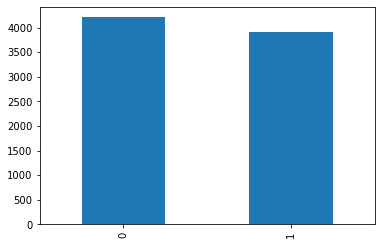

In [22]:
df['class'].value_counts().plot(kind='bar')

## Performing Bivariate analysis and checking for correlation

<AxesSubplot:>

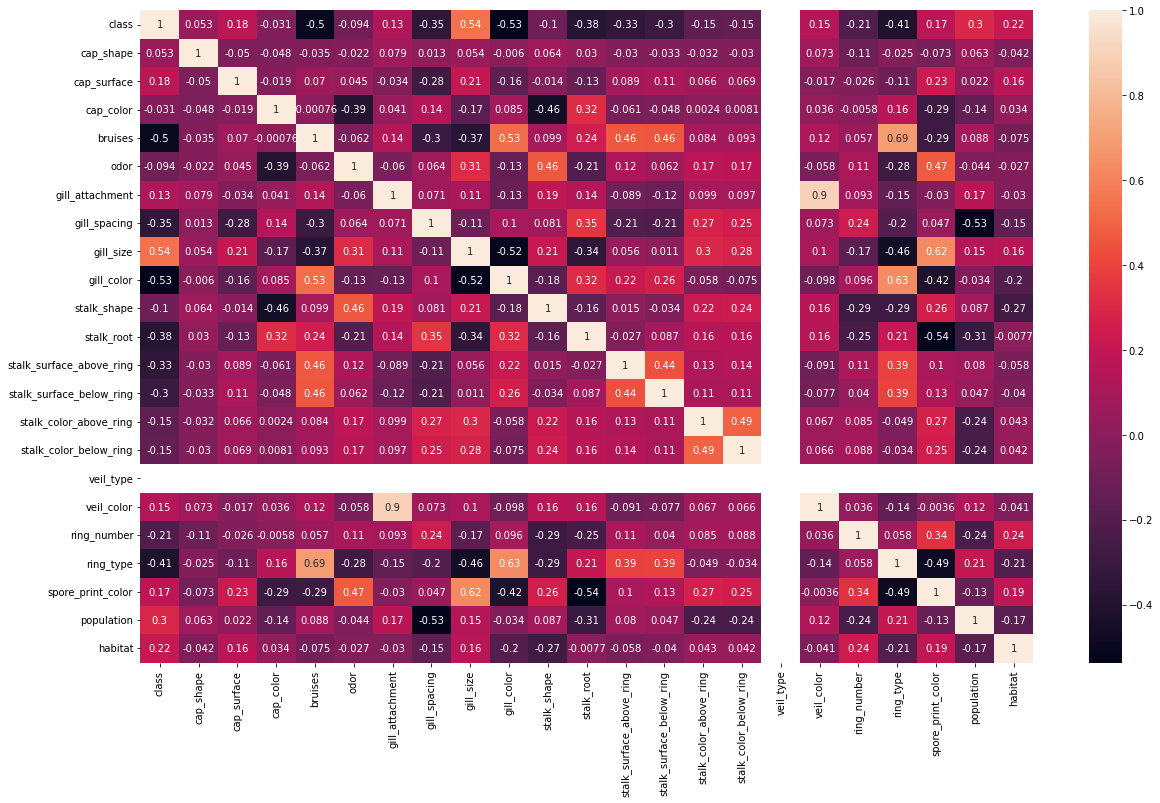

In [198]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot= True)

## Splitting the data into y variable and x variables

In [199]:
x = df.iloc[: , 1 : ]

In [201]:
y = df['class']

In [202]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

## Performing dimensionality reduction using PCA to deal with unneccesary columns

In [203]:
pca1 = PCA(n_components = 8)
pca_fit = pca1.fit_transform(x)

In [204]:
pca1.explained_variance_ratio_

array([0.33758733, 0.16581098, 0.12285821, 0.06796611, 0.05831173,
       0.05092539, 0.04670841, 0.03908416])

In [205]:
sum(pca1.explained_variance_ratio_)

0.8892523196718449

## Splitting the data into train and test datasets

In [206]:
x_train, x_test, y_train, y_test = train_test_split(pca_fit, y, test_size = 0.2, random_state = 123)

## Accuracy report Function

In [208]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

## Applying Logistic Regression

In [209]:
lr  = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [210]:
pred_lr_train = lr.predict(x_train)
pred_lr_test = lr.predict(x_test)

In [211]:
acc_report(y_train, pred_lr_train)

the accuracy of tha model is  0.8241267887367287
[[2856  489]
 [ 654 2500]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      3345
           1       0.84      0.79      0.81      3154

    accuracy                           0.82      6499
   macro avg       0.83      0.82      0.82      6499
weighted avg       0.82      0.82      0.82      6499



In [212]:
acc_report(y_test, pred_lr_test)

the accuracy of tha model is  0.8067692307692308
[[727 136]
 [178 584]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       863
           1       0.81      0.77      0.79       762

    accuracy                           0.81      1625
   macro avg       0.81      0.80      0.81      1625
weighted avg       0.81      0.81      0.81      1625



### The accuracy reports show us that logistic regression is a high bias but low variance model, this wont prove useful for us

## Applying Decision Tree

In [213]:
dtree = DecisionTreeClassifier(max_depth = 10)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [214]:
dtree = DecisionTreeClassifier(max_depth = 10)
dtree.fit(x_train, y_train)
pred_dtree_train = dtree.predict(x_train)
pred_dtree_test = dtree.predict(x_test)

In [215]:
acc_report(y_train, pred_dtree_train)

the accuracy of tha model is  0.998461301738729
[[3339    6]
 [   4 3150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3345
           1       1.00      1.00      1.00      3154

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



In [216]:
acc_report(y_test, pred_dtree_test)

the accuracy of tha model is  0.9846153846153847
[[854   9]
 [ 16 746]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       863
           1       0.99      0.98      0.98       762

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



### The accuracy reports show us that this model is a low bias low variance model and is comparitively performing better than the previous model

## Performing KNN

In [217]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [218]:
pred_knn_train = knn.predict(x_train)
pred_knn_test = knn.predict(x_test)

In [219]:
acc_report(y_train, pred_knn_train)

the accuracy of tha model is  0.9993845206954917
[[3345    0]
 [   4 3150]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3345
           1       1.00      1.00      1.00      3154

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



In [220]:
acc_report(y_test, pred_knn_test)

the accuracy of tha model is  0.9963076923076923
[[861   2]
 [  4 758]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      0.99      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### This model has proved to be the most accurate so far and has the lowest bias and the lowest variance, this model is worth pushing for production

## Applying Random Forest

In [221]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [222]:
pred_rf_train = rf.predict(x_train)
pred_rf_test = rf.predict(x_test)

In [223]:
acc_report(y_train, pred_rf_train)

the accuracy of tha model is  1.0
[[3345    0]
 [   0 3154]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3345
           1       1.00      1.00      1.00      3154

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



In [224]:
acc_report(y_test, pred_rf_test)

the accuracy of tha model is  0.9969230769230769
[[861   2]
 [  3 759]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       863
           1       1.00      1.00      1.00       762

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### This model is also a low bias low variance model but has a higher risk of overfitting than KNN

## Applying AdaBoost

In [225]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [226]:
pred_ada_train = ada.predict(x_train)
pred_ada_test = ada.predict(x_test)

In [227]:
acc_report(y_train, pred_ada_train)

the accuracy of tha model is  0.9107555008462841
[[3117  228]
 [ 352 2802]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3345
           1       0.92      0.89      0.91      3154

    accuracy                           0.91      6499
   macro avg       0.91      0.91      0.91      6499
weighted avg       0.91      0.91      0.91      6499



In [228]:
acc_report(y_test, pred_ada_test)

the accuracy of tha model is  0.8972307692307693
[[798  65]
 [102 660]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       863
           1       0.91      0.87      0.89       762

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.90      0.90      0.90      1625



### Adaboost is a mid to high bias and a comparitively higher variance

## Applying Gradient Boosting

In [229]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [230]:
pred_gb_train = gb.predict(x_train)
pred_gb_test = gb.predict(x_test)

In [231]:
acc_report(y_train, pred_gb_train)

the accuracy of tha model is  0.9639944606862594
[[3273   72]
 [ 162 2992]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3345
           1       0.98      0.95      0.96      3154

    accuracy                           0.96      6499
   macro avg       0.96      0.96      0.96      6499
weighted avg       0.96      0.96      0.96      6499



In [232]:
acc_report(y_test, pred_gb_test)

the accuracy of tha model is  0.9513846153846154
[[845  18]
 [ 61 701]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       863
           1       0.97      0.92      0.95       762

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### This model performs a bit lesser than the previous models even though the model has a lower bias

## Applying SVC

In [233]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [234]:
pred_svc_train = svc.predict(x_train)
pred_svc_test = svc.predict(x_test)

In [235]:
acc_report(y_train, pred_svc_train)

the accuracy of tha model is  0.9863055854746884
[[3320   25]
 [  64 3090]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3345
           1       0.99      0.98      0.99      3154

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499



In [236]:
acc_report(y_test, pred_svc_test)

the accuracy of tha model is  0.9803076923076923
[[857   6]
 [ 26 736]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       863
           1       0.99      0.97      0.98       762

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



## Hence we conclude that KNN has by far been proved the best model for this data